# Week 3
# Rasika Bhalerao
# Agenda

- Fashion dataset
- Using a Neural Net with [SKlearn](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)
- Creating a Neural Net in preparation for [homework 6](https://github.com/MIDS-W207/coursework_2022/blob/main/Homework/06%20Neural%20Networks.ipynb)

In [33]:
# Imports from homework

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style

import tensorflow as tf
from tensorflow import keras
from keras import metrics
tf.get_logger().setLevel('INFO')

Label: t-shirt


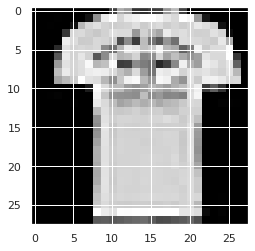

In [34]:
# Fashion dataset from homework

from keras.datasets import fashion_mnist

# Load the Fashion MNIST dataset.
(X_train_fashion, Y_train_fashion), (X_test_fashion, Y_test_fashion) = fashion_mnist.load_data()
X_train_fashion = X_train_fashion / 255.
X_test_fashion = X_test_fashion / 255.

# Flatten Y_train and Y_test, so they become vectors of label values.
Y_train_fashion = Y_train_fashion.flatten()
Y_test_fashion = Y_test_fashion.flatten()

label_names = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
               'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

# Apply random shufflying to training examples.
np.random.seed(0)
indices = np.arange(X_train_fashion.shape[0])
shuffled_indices = np.random.permutation(indices)
X_train_fashion = X_train_fashion[shuffled_indices]
Y_train_fashion = Y_train_fashion[shuffled_indices]

# Show the first training example.
print('Label: %s' %label_names[Y_train_fashion[0]])
plt.imshow(X_train_fashion[0], cmap='gray')
plt.show()

In [35]:
# Understanding the dataset shape

print(f"X train total shape {X_train_fashion.shape}")
print(f"Y train total shape {Y_train_fashion.shape}")
print(f"X test total shape {X_test_fashion.shape}")
print(f"Y test total shape {Y_test_fashion.shape}")
print()
print(f"X train item shape {X_train_fashion[0].shape}")
print(f"X test item shape {X_test_fashion[0].shape}")
print()
print(f"3 examples of Y: {Y_train_fashion[0]} {Y_train_fashion[10]} {Y_train_fashion[100]}")

X train total shape (60000, 28, 28)
Y train total shape (60000,)
X test total shape (10000, 28, 28)
Y test total shape (10000,)

X train item shape (28, 28)
X test item shape (28, 28)

3 examples of Y: 0 5 1


In [36]:
# Make it so each row (item) is a vector of features rather than a square of features
X_train_reshaped = np.reshape(X_train_fashion, (60000, 28*28))
X_test_reshaped = np.reshape(X_test_fashion, (10000, 28*28))

print(f"X train reshaped shape {X_train_reshaped.shape}")
print(f"X test reshaped shape {X_test_reshaped.shape}")

X train reshaped shape (60000, 784)
X test reshaped shape (10000, 784)


# Using a neural net

In [54]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(max_iter=3)
model.fit(X_train_reshaped, Y_train_fashion)
predicted_labels = model.predict(X_test_reshaped)
print(f'Predicted | Expected')
for i in range(5):
  print(f'{label_names[predicted_labels[i]]} | {label_names[Y_test_fashion[i]]}')

Predicted | Expected
ankle boot | ankle boot
pullover | pullover
trouser | trouser
trouser | trouser
shirt | shirt


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


# Creating a neural network with one hidden layer

In [49]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# Define the model
# (notice this cell uses no data)

# Input size is 28*28 (number of features)
# Output size is 10 (number of classes)

our_model = Sequential()
our_model.add(Dense(200, input_shape=(28*28,), activation='relu')) # hidden layer size is 200
our_model.add(Dense(10, activation='softmax')) # input_dim is inferred 200
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
our_model.compile(loss='sparse_categorical_crossentropy', optimizer=opt) # "sparse_" is needed for integer classes

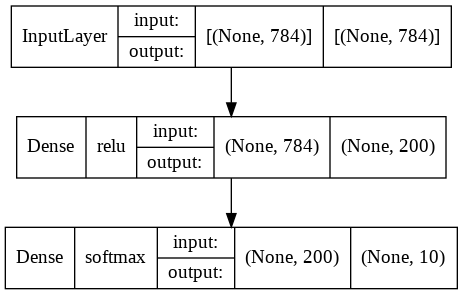

In [50]:
tf.keras.utils.plot_model(
    our_model,
    show_shapes=True,
    show_layer_names=False,
    show_layer_activations=True,
)

In [55]:
# Using the neural network we created
# (now this cell uses data)

our_model.fit(X_train_reshaped, Y_train_fashion, epochs=2)
our_predicted_labels = our_model.predict(X_test_reshaped)
print(f'Predicted | Expected')
for i in range(5):
  print(f'{label_names[np.argmax(our_predicted_labels[i])]} | {label_names[Y_test_fashion[i]]}') # note the argmax

Epoch 1/2
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3834
Epoch 2/2
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3770
Predicted | Expected
ankle boot | ankle boot
pullover | pullover
trouser | trouser
trouser | trouser
shirt | shirt
